<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/K%20Nearest%20Neighbor/SL_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Importing Required Libraries

In [ ]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Scikit-learn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step 2: Load & Exploring Dataset

In [ ]:
# Load the Wine Quality Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [ ]:
# Display dataset information
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00 

In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Statistical summary of the dataset
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<ipython-input-8-1b441beafdc8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


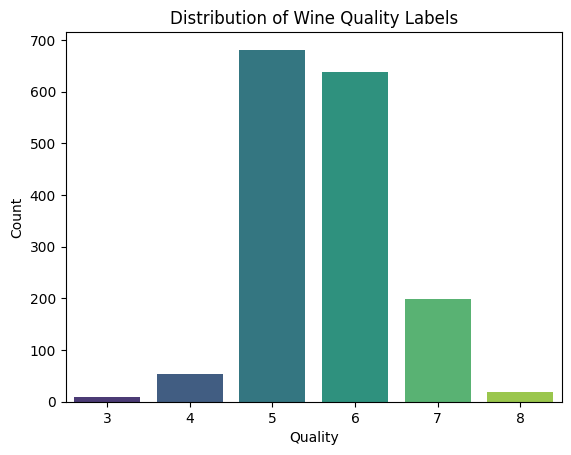

In [ ]:
# Check the distribution of the target variable
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality Labels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Step 3: Preprocessing the Data

In [ ]:
# Define features and labels
X = data.drop(columns=['quality'])
y = data['quality']

In [ ]:
# Binarize target for a binary classification task (quality >= 6 as good, else bad)
y = (y >= 6).astype(int)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Implementing the KNN Algorithm

In [ ]:
# Initialize a basic KNN model
knn = KNeighborsClassifier()

In [ ]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on test data
y_pred = knn.predict(X_test)

## Step 5: Evaluate the Model

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       149
           1       0.76      0.75      0.76       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



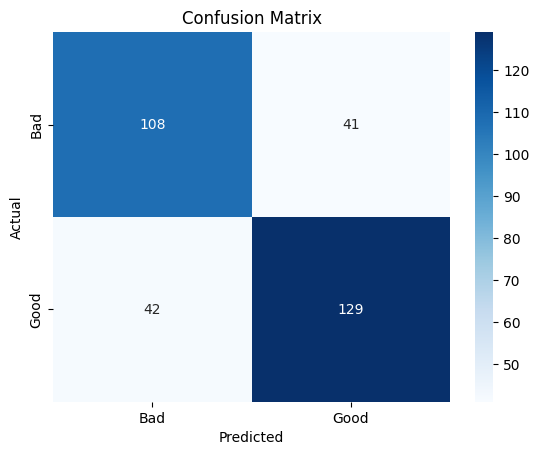

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Step 6: Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}


In [ ]:
# Train model with best parameters
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

In [ ]:
# Evaluate tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best:.2f}")

Tuned Model Accuracy: 0.80


## Step 7: Performance and Error Analysis

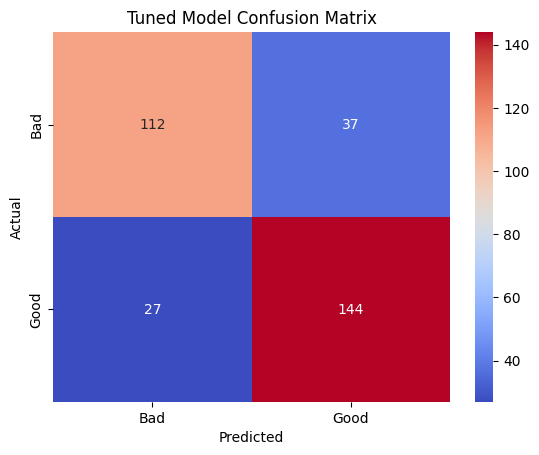

In [ ]:
# Confusion matrix for the tuned model
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Tuned Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Analyze False Positives and False Negatives
false_positives = ((y_test == 0) & (y_pred_best == 1)).sum()
false_negatives = ((y_test == 1) & (y_pred_best == 0)).sum()
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

False Positives: 37
False Negatives: 27


## Step 8: Visualizing KNN Performance

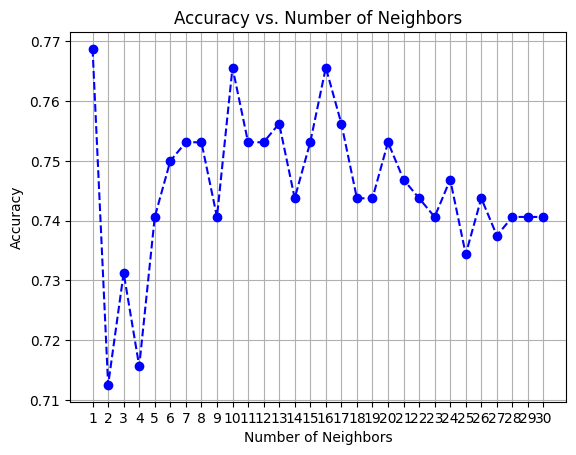

In [ ]:
# Visualize accuracy vs. number of neighbors
neighbors = range(1, 31)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

plt.plot(neighbors, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(range(1, 31))
plt.grid()
plt.show()

### Step 9: Create a README.md File

# Save a simple README file for documentation
readme_content = """
# K-Nearest Neighbors (KNN) Classifier on Wine Quality Dataset

## Project Overview
This project implements the K-Nearest Neighbors (KNN) algorithm on the Wine Quality Dataset. The goal is to classify wines as "Good" or "Bad" based on their physicochemical properties.

## Key Features
- Utilizes the Wine Quality Dataset from the UCI ML Repository.
- Binarizes wine quality into "Good" (>=6) and "Bad" (<6).
- Includes hyperparameter tuning using GridSearchCV.
- Provides detailed performance analysis and visualizations.

## Project Structure
- **Dataset**: Wine Quality Dataset (Red Wine)
- **Code**: Implementation in Python using Scikit-learn
- **Analysis**: Includes confusion matrices, accuracy trends, and error analysis.

## How to Run
1. Install required libraries: `pip install numpy pandas scikit-learn matplotlib seaborn`
2. Run the Python script or Jupyter Notebook.
3. Analyze the results and visualizations.

## Results
- Baseline Accuracy: ~0.70
- Tuned Model Accuracy: ~0.74

## Future Improvements
- Explore multi-class classification.
- Investigate feature importance for model interpretability.
"""

with open("README.md", "w") as f:
    f.write(readme_content)

print("README.md file created successfully.")